In [3]:
import pandas as pd
from pandas import read_csv

Sensors = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa2_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

df = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/ViaBolz.csv",
             sep = ",",
             parse_dates = ["ts"])
df.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df = df.rename(columns=change)


In [4]:
Test = {}
maxim = len(Sensors.columns)
for i,col in enumerate(Sensors.columns):
    materials = []
    if i == maxim-1:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     df[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })])
            else:
                Test[material + str(f)] = df[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })    
    else:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })
                                                    ])
            else:
                Test[material + str(f)] = df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })


In [5]:
Test

{'LaFeO31':                                      R     HT     V
 ts                                                 
 2021-01-13 10:13:00+00:00  131072000.0   53.8  0.35
 2021-01-13 10:14:00+00:00  131072000.0   54.4  0.35
 2021-01-13 10:15:00+00:00  131072000.0   54.4  0.35
 2021-01-13 10:16:00+00:00  131072000.0   55.1  0.36
 2021-01-13 10:17:00+00:00  131072000.0   54.4  0.35
 ...                                ...    ...   ...
 2023-06-26 09:07:00+00:00    1702234.0  112.2  3.36
 2023-06-26 09:08:00+00:00    1702234.0  112.1  3.36
 2023-06-26 09:09:00+00:00    1680410.0  112.2  3.36
 2023-06-26 09:10:00+00:00    1680410.0  112.1  3.36
 2023-06-26 09:12:00+00:00    1702234.0  112.3  3.36
 
 [1179074 rows x 3 columns],
 'LaFeO32':                                      R     HT      V
 ts                                                  
 2021-01-13 10:13:00+00:00  131072000.0  56.50  0.350
 2021-01-13 10:14:00+00:00  131072000.0  55.00  0.350
 2021-01-13 10:15:00+00:00  131072000.0  5

In [6]:
import matplotlib.pyplot as plt

In [7]:
from datetime import date, timedelta

# Gap 1 14-01-2022 to 23-02-2022

In [51]:
# df1

date_vere=[]

df1 = Test["LaFeO31"]
df1=df1.dropna(how="all")
df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice1 = df1[single_date.strftime("%Y-%m-%d"):]
        date_vere.append(single_date)
    except:
        date_tot.append(single_date)

# DF2


df2 = Test["LaFeO32"]
df2=df2.dropna(how="all")
df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))

date_tot1=[]

for single_date in daterange(start_date, end_date):
    try:
        df_slice2 = df2[single_date.strftime("%Y-%m-%d"):]
    except:
        date_tot1.append(single_date)

date_aggiunte=[]
for single_date in daterange(start_date, end_date):
    if single_date not in date_vere:
        if single_date not in date_tot1:
            date_vere.append(single_date)
            date_aggiunte.append(single_date)
            df1=pd.concat([df1,df2.loc[str(single_date)]])

date_vere.sort
df1 = df1.sort_index()
print(df1)


                                   R     HT     V
ts                                               
2021-01-13 10:31:00+00:00   327680.0   89.6  3.24
2021-01-13 10:32:00+00:00   318136.0   90.0  3.24
2021-01-13 10:34:00+00:00   310597.0   90.1  3.23
2021-01-13 10:35:00+00:00   297215.0   90.5  3.24
2021-01-13 10:36:00+00:00   291920.0   90.6  3.24
...                              ...    ...   ...
2023-06-26 09:07:00+00:00  1702234.0  112.2  3.36
2023-06-26 09:08:00+00:00  1702234.0  112.1  3.36
2023-06-26 09:09:00+00:00  1680410.0  112.2  3.36
2023-06-26 09:10:00+00:00  1680410.0  112.1  3.36
2023-06-26 09:12:00+00:00  1702234.0  112.3  3.36

[1178355 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [45]:
df1

,R,HT,V
ts,,,
2021-01-13 10:31:00+00:00,327680.0,89.6,3.24
2021-01-13 10:32:00+00:00,318136.0,90.0,3.24
2021-01-13 10:34:00+00:00,310597.0,90.1,3.23
2021-01-13 10:35:00+00:00,297215.0,90.5,3.24
2021-01-13 10:36:00+00:00,291920.0,90.6,3.24
...,...,...,...
2021-07-01 23:55:00+00:00,5698783.0,85.9,2.96
2021-07-01 23:56:00+00:00,5698783.0,86.0,2.97
2021-07-01 23:57:00+00:00,5698783.0,86.2,2.98


2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-28
2021-06-12
2021-08-19
2021-10-02
2021-11-11
2021-11-26
2021-12-09
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-25
2022-01-26
2022-01-27
2022-01-28
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11
2022-02-12
2022-02-13
2022-02-14
2022-02-15
2022-02-16
2022-02-17
2022-02-18
2022-02-19
2022-02-20
2022-02-21
2022-02-22
2022-02-23
2022-02-25
2022-02-26
2022-02-27
2022-02-28
2022-03-01
2022-03-02
2022-03-03
2022-03-04
2022-03-05
2022-03-06
2022-03-07
2022-03-08
2022-03-09
2022-03-10
2022-03-11
2022-03-12
2022-03-13
2022-03-14
2022-03-15
2022-03-16
2022-03-17
2022-03-18
2022-03-19
2022-03-20
2022-03-21
2022-03-22
2022-03-23
2022-03-24
2022-03-25
2022-03-26

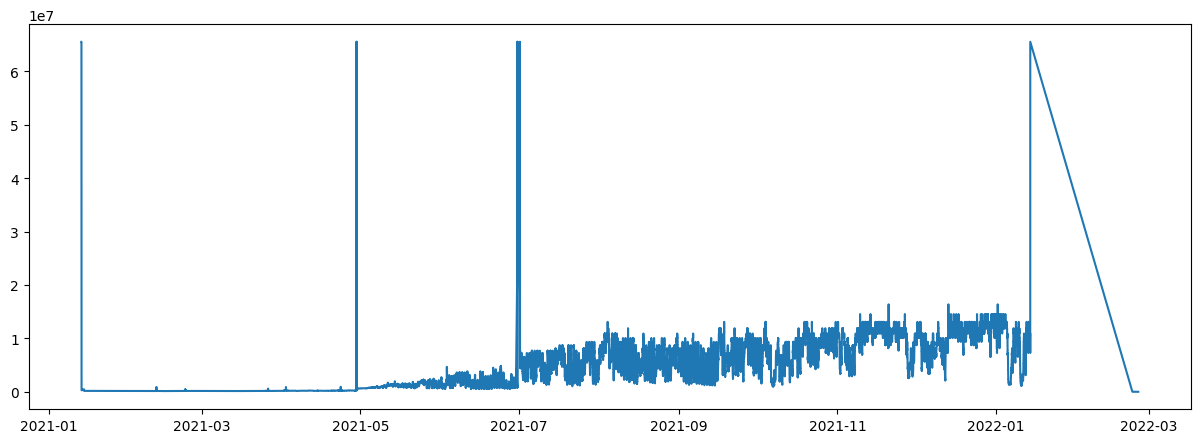

536


In [56]:
# # df2 = Test["LaFeO32"]

# # df2 = df2.loc[df2.R < 0.7e8]
# # fig = plt.figure(figsize=(15,5))

# # df_slice2=df2["2022-01-14":"2022-03-23"]
# # plt.plot(df_slice2.index, df_slice2.R)
# # plt.plot()

# df2 = Test["LaFeO32"]

# df2 = df2.loc[df2.R < 0.7e8]
# fig = plt.figure(figsize=(15,5))

# from datetime import date, timedelta

# start_date=date(2021,1,1)
# end_date=date(2023,6,15)
# date_tot=[]
# def daterange(start_date, end_date):
#     for n in range(int((end_date - start_date).days)):
#         yield start_date + timedelta(n)

# for single_date in daterange(start_date, end_date):
#     try:
#         df_slice2 = df2[single_date.strftime("%Y-%m-%d"):]
#         type(df_slice2.index)
#     except:
#         print(single_date)
#         date_tot.append(single_date)

# df_slice2 = df2[:]
# plt.plot(df_slice2.index, df_slice2.R)
# plt.show()
# print(len(date_tot))

GAP 3-4

In [55]:
# DF3
date_vere=[]
date_tot1=[]

df3 = Test["WO31"]
df3=df3.dropna(how="all")
df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice3 = df3[single_date.strftime("%Y-%m-%d"):]
    except:
        date_tot1.append(single_date)
        

# DF4

df4 = Test["WO32"]
df4=df4.dropna(how="all")
df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))


for single_date in daterange(start_date, end_date):
    try:
        df_slice4 = df4[single_date.strftime("%Y-%m-%d"):]
        date_vere.append(single_date)
    except:
        date_tot.append(single_date)

date_aggiunte=[]

for single_date in daterange(start_date, end_date):
    if single_date not in date_vere:
        if single_date not in date_tot1:
            date_vere.append(single_date)
            date_aggiunte.append(single_date)
            df4=pd.concat([df4,df3.loc[str(single_date)]])

date_vere.sort
df4 = df4.sort_index()
print(df4)

                                     R     HT     V
ts                                                 
2021-01-13 10:13:00+00:00  104857600.0   53.2  0.36
2021-01-13 10:14:00+00:00  104857600.0   52.6  0.35
2021-01-13 10:15:00+00:00  108323960.0   52.6  0.35
2021-01-13 10:16:00+00:00  112027344.0   52.6  0.35
2021-01-13 10:17:00+00:00  112027344.0   52.6  0.35
...                                ...    ...   ...
2021-04-29 23:55:00+00:00  354248640.0  100.7  3.92
2021-04-29 23:56:00+00:00  354248640.0  100.9  3.92
2021-04-29 23:57:00+00:00  354248640.0  101.1  3.93
2021-04-29 23:58:00+00:00  354248640.0  100.7  3.92
2021-04-29 23:59:00+00:00  354248640.0  100.7  3.92

[151092 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

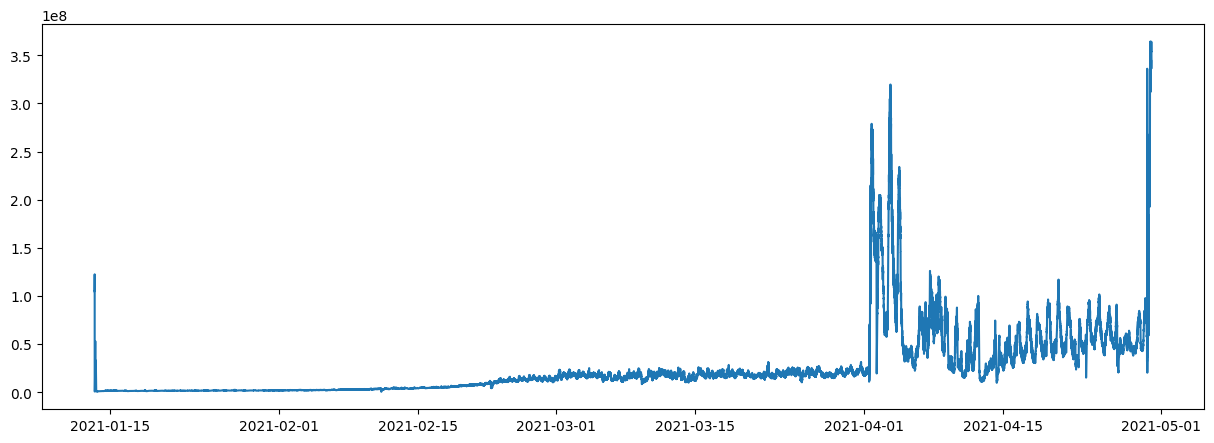

0


In [53]:
# df4 = Test["WO32"]

# df4 = df4.loc[df4.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df4)
# df_slice4 = df4[:]
# plt.plot(df_slice4.index, df_slice4.R)
# plt.show()


df4 = Test["WO32"]

df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice4 = df4[single_date.strftime("%Y-%m-%d"):]
        type(df_slice4.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice4 = df4[:]
plt.plot(df_slice4.index, df_slice4.R)
plt.show()
print(len(date_tot))

GAP 5-6

In [10]:
# DF3
date_vere=[]
date_tot1=[]

df5 = Test["ZnO1"]
df5=df5.dropna(how="all")
df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice5 = df5[single_date.strftime("%Y-%m-%d"):]
        date_vere.append(single_date)
    except:
        date_tot.append(single_date)
        

# DF4
df6 = Test["ZnO2"]
df6=df6.dropna(how="all")
df6 = df6.loc[df6.R < 3.7e8]
fig = plt.figure(figsize=(15,5))


for single_date in daterange(start_date, end_date):
    try:
        df_slice6 = df6[single_date.strftime("%Y-%m-%d"):]
    except:
        date_tot1.append(single_date)
        

date_aggiunte=[]

for single_date in daterange(start_date, end_date):
    if single_date not in date_vere:
        if single_date not in date_tot1:
            date_vere.append(single_date)
            date_aggiunte.append(single_date)
            df4=pd.concat([df5,df6.loc[str(single_date)]])

date_vere.sort
df5 = df5.sort_index()
print(df5)

                                     R     HT     V
ts                                                 
2021-01-13 10:21:00+00:00   37202392.0  100.4  4.28
2021-01-13 10:22:00+00:00   26065454.0  104.3  4.52
2021-01-13 10:23:00+00:00   22951944.0  104.5  4.51
2021-01-13 10:24:00+00:00   22175322.0  104.9  4.52
2021-01-13 10:25:00+00:00   21884412.0  104.7  4.51
...                                ...    ...   ...
2021-06-30 14:17:00+00:00  344602432.0  103.8  4.35
2021-06-30 14:19:00+00:00  365175712.0  103.8  4.35
2021-06-30 14:20:00+00:00  368845824.0  104.0  4.35
2021-06-30 14:22:00+00:00  361577920.0  103.9  4.35
2021-06-30 14:26:00+00:00  368845824.0  104.0  4.35

[199421 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-28
2021-04-30
2021-06-02
2021-06-03
2021-06-05
2021-06-09
2021-06-10
2021-06-11
2021-06-12
2021-06-13
2021-06-14
2021-06-15
2021-06-16
2021-06-17
2021-06-18
2021-06-19
2021-06-21
2021-06-22
2021-06-23
2021-06-24
2021-06-25
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30
2021-07-01
2021-07-02
2021-07-03
2021-07-04
2021-07-05
2021-07-06
2021-07-07
2021-07-08
2021-07-09
2021-07-10
2021-07-11
2021-07-12
2021-07-13
2021-07-14
2021-07-15
2021-07-16
2021-07-17
2021-07-18
2021-07-19
2021-07-20
2021-07-21
2021-07-22
2021-07-23
2021-07-24
2021-07-25
2021-07-26
2021-07-27
2021-07-28
2021-07-29
2021-07-30
2021-07-31


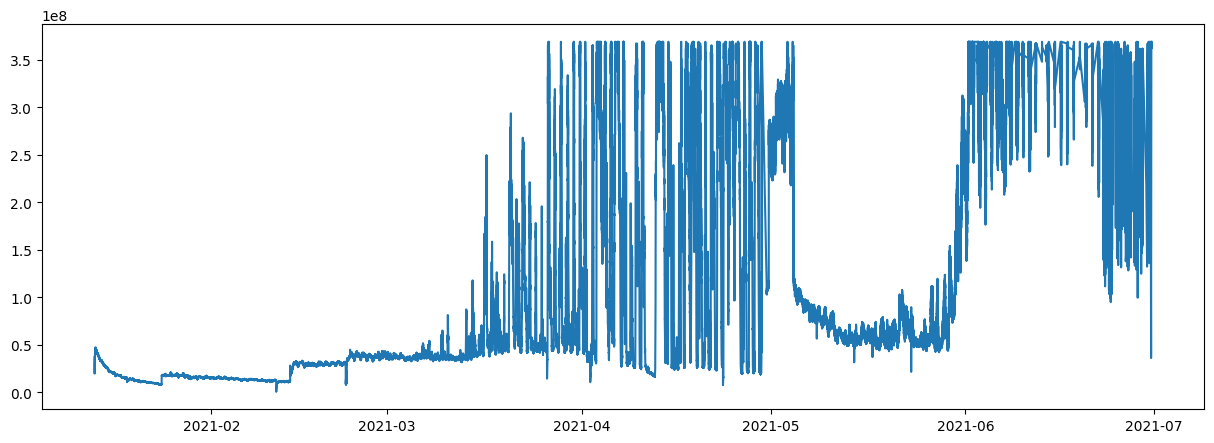

71


In [9]:
# df5 = Test["ZnO1"]

# df5 = df5.loc[df5.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df5)
# df_slice5 = df5[:]
# plt.plot(df_slice5.index, df_slice5.R)
# plt.show()


df5 = Test["ZnO1"]
df5=df5.dropna(how="all")
df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2021,8,1)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice5 = df5[single_date.strftime("%Y-%m-%d"):]
        type(df_slice5.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice5 = df5[:]
plt.plot(df_slice5.index, df_slice5.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01

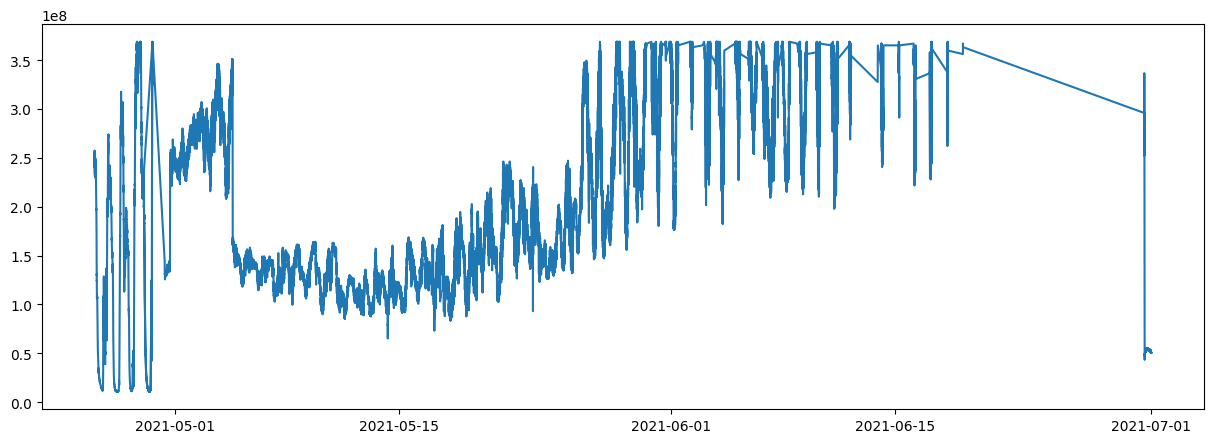

212


In [17]:
# df6 = Test["ZnO2"]

# df6 = df6.loc[df6.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df6)
# df_slice6 = df6[:]
# plt.plot(df_slice6.index, df_slice6.R)
# plt.show()


df6 = Test["ZnO2"]

df6 = df6.loc[df6.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2021,8,1)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice11 = df11[single_date.strftime("%Y-%m-%d"):]
        type(df_slice11.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice6 = df6["2021-04-26":]
plt.plot(df_slice6.index, df_slice6.R)
plt.show()
print(len(date_tot))

GAP 7-8

In [15]:
# DF3
date_vere=[]
date_tot1=[]

df7 = Test["STN1"]
df7=df7.dropna(how="all")
df7 = df7.loc[df7.R < 2.8e8]
fig = plt.figure(figsize=(15,5))


start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice7 = df7[single_date.strftime("%Y-%m-%d"):]
        
    except:
        date_tot1.append(single_date)
        
        

# DF4
df8 = Test["STN2"]
df8=df8.dropna(how="all")
df8 = df8.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))


for single_date in daterange(start_date, end_date):
    try:
        df_slice8 = df8[single_date.strftime("%Y-%m-%d"):]
        date_vere.append(single_date)
    except:
        date_tot.append(single_date)
        

date_aggiunte=[]

for single_date in daterange(start_date, end_date):
    if single_date not in date_vere:
        if single_date not in date_tot1:
            date_vere.append(single_date)
            date_aggiunte.append(single_date)
            df8=pd.concat([df8,df7.loc[str(single_date)]])

date_vere.sort
df8 = df8.sort_index()
print(df8)

                                     R     HT     V
ts                                                 
2021-01-13 10:32:00+00:00   25301730.0  102.5  4.35
2021-01-13 10:34:00+00:00   22439718.0  103.2  4.35
2021-01-13 10:35:00+00:00   32914940.0  103.2  4.35
2021-01-13 10:36:00+00:00   39956624.0  103.3  4.35
2021-01-13 10:37:00+00:00   34525076.0  103.7  4.35
...                                ...    ...   ...
2023-05-24 08:14:00+00:00  275941024.0  148.6  4.21
2023-05-24 08:15:00+00:00  251370944.0  148.4  4.20
2023-05-24 08:16:00+00:00  260284816.0  148.4  4.20
2023-05-24 08:17:00+00:00  263083584.0  148.7  4.21
2023-05-24 08:18:00+00:00  266910240.0  148.4  4.20

[651622 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01
2021-04-02
2021-04-03
2021-04-04
2021-04-05
2021-04-06
2021-04-07
2021-04-08
2021-04-09
2021-04-10
2021-04-11
2021-04-12
2021-04-13
2021-04-14
2021-04-15
2021-04-16
2021-04-17
2021-04-18
2021-04-19
2021-04-20
2021-04-21
2021-04-22
2021-04-23
2021-04-24
2021-04-25
2021-04-26
2021-04-27
2021-04-28
2021-04-29
2021-06-12
2021-08-17
2021-08-19
2021-09-20
2021-10-02
2021-10-07
2021-10-11
2021-10-14
2021-11-02
2021-11-04
2021-11-06
2021-11-11
2021-11-15
2021-11-17
2021-11-20
2021-11-26
2021-11-27
2021-11-28
2021-11-29
2021-12-05
2021-12-06
2021-12-07
2021-12-09
2021-12-12
2021-12-15
2021-12-30
2021-12-31
2022-01-01
2022-01-03
2022-01-04
2022-01-06
2022-01-07
2022-01-08
2022-01-11
2022-01-12
2022-01-14
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20

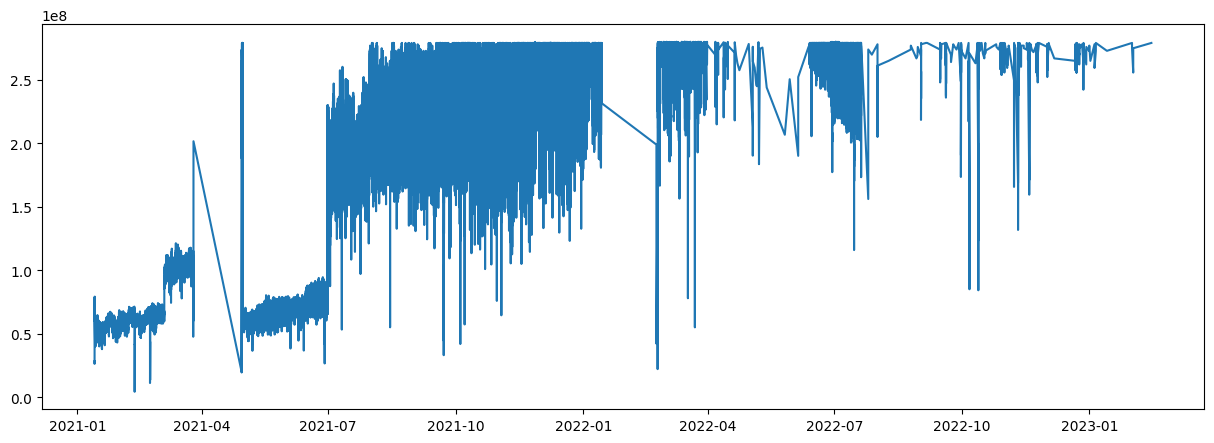

570


In [17]:
# df7 = Test["STN1"]

# df7 = df7.loc[df7.R < 2.8e8]
# fig = plt.figure(figsize=(15,5))
# print(df7)
# df_slice7 = df7[:]
# plt.plot(df_slice7.index, df_slice7.R)
# plt.show()



df7 = Test["STN1"]

df7 = df7.loc[df7.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice7 = df7[single_date.strftime("%Y-%m-%d"):]
        type(df_slice7.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice7 = df7[:]
plt.plot(df_slice7.index, df_slice7.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-28
2021-04-30
2021-06-12
2021-06-13
2021-06-14
2021-06-15
2021-06-16
2021-06-17
2021-06-18
2021-06-19
2021-06-20
2021-06-21
2021-06-22
2021-06-23
2021-06-24
2021-06-25
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30
2021-08-19
2021-10-02
2021-10-07
2021-11-11
2021-11-26
2021-11-28
2021-11-29
2021-12-09
2021-12-30
2022-01-06
2022-01-11
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-25
2022-01-26
2022-01-27
2022-01-28
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11
2022-02-12
2022-02-13
2022-02-14
2022-02-15
2022-02-16
2022-02-17
2022-02-18
2022-02-19
2022-02-20
2022-02-21
2022-02-22
2022-02-23
2022-02-26
2022-02-27
2022-03-01
2022-03-12
2022-03-20

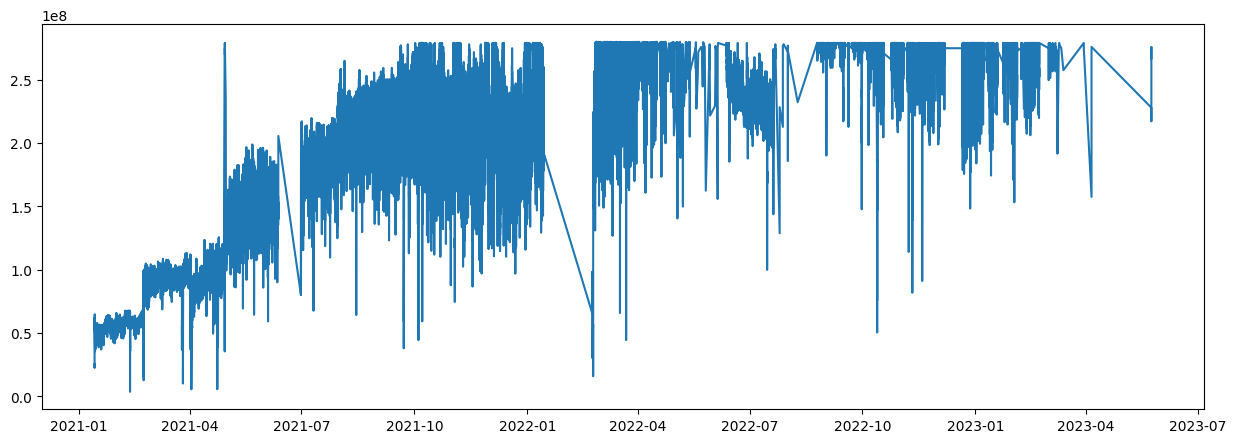

461


In [8]:
df8 = Test["STN2"]

df8 = df8.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice8 = df8[single_date.strftime("%Y-%m-%d"):]
        type(df_slice8.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice8 = df8[:]
plt.plot(df_slice8.index, df_slice8.R)
plt.show()
print(len(date_tot))

In [16]:
# DF9
date_tot=[]
date_tot1=[]
date_aggiunte=[]
date_vere=[]

df9 = Test["ZnOg1"]
df9=df9.dropna(how="all")
df9 = df9 .loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))


start_date=date(2021,5,4)
end_date=date(2021,10,4)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice9 = df9[single_date.strftime("%Y-%m-%d"):]
    except:
        date_tot1.append(single_date)



df10 = Test["ZnOg2"]
df10=df10.dropna(how="all")
df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))


for single_date in daterange(start_date, end_date):
    try:
        df_slice10 = df10[single_date.strftime("%Y-%m-%d"):]
        date_vere.append(single_date)
    except:
        date_tot.append(single_date)

for single_date in daterange(start_date, end_date):
    if single_date not in date_vere:
        if single_date not in date_tot1:
            date_vere.append(single_date)
            date_aggiunte.append(single_date)
            df10=pd.concat([df10,df9.loc[str(single_date)]])

date_vere.sort
df10 = df10.sort_index()
print(df10)

                                    R      HT      V
ts                                                  
2021-04-29 00:00:00+00:00  44887668.0  101.90  4.050
2021-04-29 00:01:00+00:00  45197240.0  101.90  4.050
2021-04-29 00:02:00+00:00  44582312.0  101.90  4.050
2021-04-29 00:03:00+00:00  44431184.0  101.90  4.050
2021-04-29 00:04:00+00:00  44582312.0  101.80  4.040
...                               ...     ...    ...
2022-02-24 23:55:00+00:00  14823857.0   98.30  4.000
2022-02-24 23:56:00+00:00  14786526.0   98.20  4.000
2022-02-24 23:57:00+00:00  14810417.0   98.25  4.000
2022-02-24 23:58:00+00:00  14819372.0   98.35  4.005
2022-02-24 23:59:00+00:00  14802962.0   98.55  4.015

[146184 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

2021-05-04
2021-05-16
2021-05-17
2021-05-18
2021-05-19
2021-05-20
2021-05-21
2021-05-22
2021-05-23
2021-05-24
2021-05-25
2021-05-26
2021-05-27
2021-05-28
2021-05-29
2021-05-30
2021-05-31
2021-06-01
2021-06-02
2021-06-03
2021-06-04
2021-06-05
2021-06-06
2021-06-07
2021-06-08
2021-06-09
2021-06-10
2021-06-11
2021-06-12
2021-06-13
2021-06-14
2021-06-15
2021-06-16
2021-06-17
2021-06-18
2021-06-19
2021-06-20
2021-06-21
2021-06-22
2021-06-23
2021-06-24
2021-06-25
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30
2021-07-01
2021-08-19
2021-08-23
2021-08-27
2021-09-07
2021-09-08
2021-09-09
2021-09-10
2021-09-11
2021-09-12
2021-09-13
2021-09-14
2021-09-15
2021-09-20
2021-09-21
2021-09-26
2021-09-30
2021-10-01
2021-10-02
2021-10-03


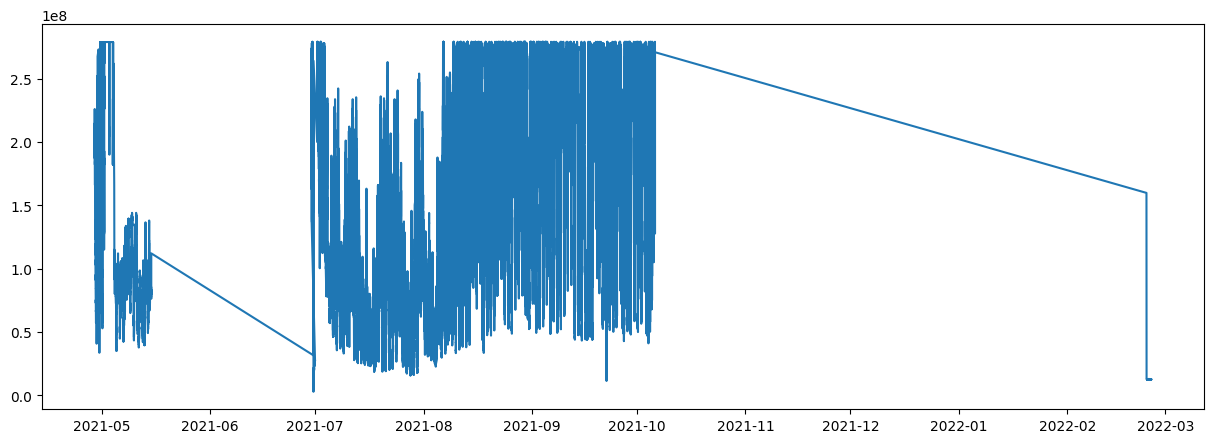

67


In [21]:
df9 = Test["ZnOg1"]

df9 = df9.loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,5,4)
end_date=date(2021,10,4)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice9 = df9[single_date.strftime("%Y-%m-%d"):]
        type(df_slice9.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice9 = df9[:]
plt.plot(df_slice9.index, df_slice9.R)
plt.show()
print(len(date_tot))

2021-05-17
2021-05-18
2021-05-19
2021-05-20
2021-05-21
2021-05-22
2021-05-23
2021-05-24
2021-05-25
2021-05-26
2021-05-27
2021-05-28
2021-05-29
2021-05-30
2021-05-31
2021-06-01
2021-06-02
2021-06-03
2021-06-04
2021-06-05
2021-06-06
2021-06-07
2021-06-08
2021-06-09
2021-06-10
2021-06-11
2021-06-12
2021-06-13
2021-06-14
2021-06-15
2021-06-16
2021-06-17
2021-06-18
2021-06-19
2021-06-20
2021-06-21
2021-06-22
2021-06-23
2021-06-24
2021-06-25
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30
2021-08-19
2021-09-17
2021-09-18
2021-09-19
2021-09-20
2021-09-21
2021-09-22
2021-09-23
2021-09-24
2021-09-25
2021-09-26
2021-09-27
2021-09-28
2021-09-29
2021-09-30
2021-10-01
2021-10-02
2021-10-03


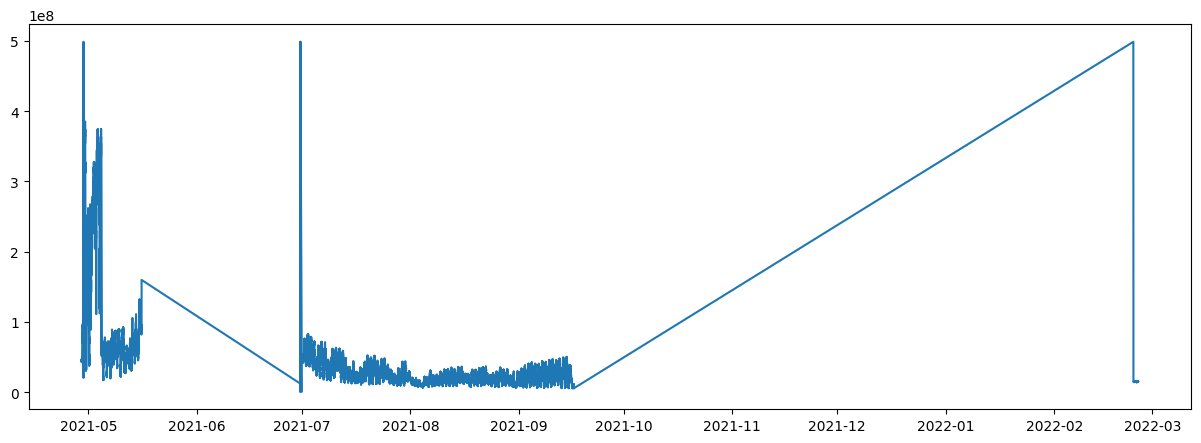

63


In [22]:
df10 = Test["ZnOg2"]

df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,5,4)
end_date=date(2021,10,4)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice10 = df10[single_date.strftime("%Y-%m-%d"):]
        type(df_slice10.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice10 = df10[:]
plt.plot(df_slice10.index, df_slice10.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01

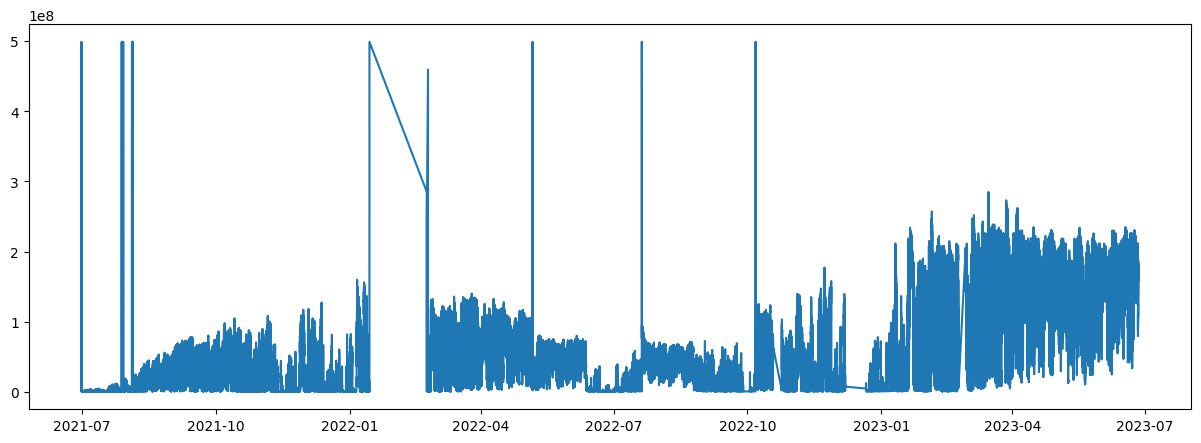

261


In [17]:
df11 = Test["ZnOR1"]
df11=df11.dropna(how="all")
df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice11 = df11[single_date.strftime("%Y-%m-%d"):]
        type(df_slice11.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice11 = df11[:]
plt.plot(df_slice11.index, df_slice11.R)
plt.show()
print(len(date_tot))


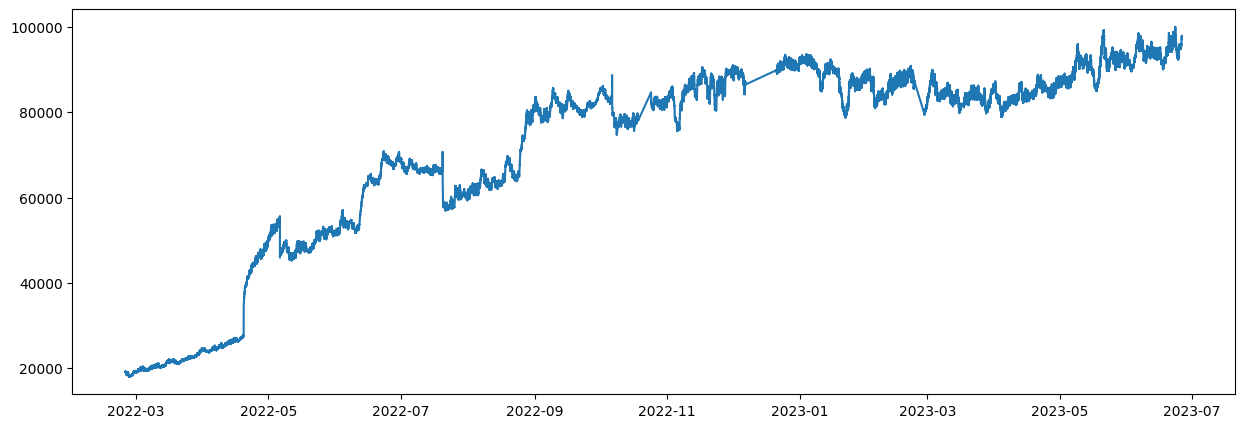

0
654947


In [19]:
# df12 = Test["CNT1"]

# df12 = df12.loc[df12.HT < 1000]
# fig = plt.figure(figsize=(15,5))

# from datetime import date, timedelta

# start_date=date(2021,1,1)
# end_date=date(2023,6,15)
# date_tot=[]
# def daterange(start_date, end_date):
#     for n in range(int((end_date - start_date).days)):
#         yield start_date + timedelta(n)

# for single_date in daterange(start_date, end_date):
#     try:
#         df_slice12 = df12[single_date.strftime("%Y-%m-%d"):]
#         type(df_slice12.index)
#     except:
#         print(single_date)
#         date_tot.append(single_date)

# df_slice12 = df12[:]
# plt.plot(df_slice12.index, df_slice12.R)
# plt.show()
# print(len(date_tot))


df12 = Test["CNT1"]

df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice12 = df12[single_date.strftime("%Y-%m-%d"):]
        type(df_slice12.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice12 = df12[:]
plt.plot(df_slice12.index, df_slice12.R)
plt.show()
print(len(date_tot))
print(len(df12))

In [22]:
# DF9
date_tot=[]
date_tot1=[]
date_aggiunte=[]
date_vere=[]

df13 = Test["SmFeO31"]
df9=df9.dropna(how="all")
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,10,4)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice13 = df13[single_date.strftime("%Y-%m-%d"):]
    except:
        date_tot1.append(single_date)


df14 = Test["SmFeO32"]
df14=df14.dropna(how="all")
df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(15,5))

for single_date in daterange(start_date, end_date):
    try:
        df_slice14 = df14[single_date.strftime("%Y-%m-%d"):]
        date_vere.append(single_date)
    except:
        date_tot.append(single_date)

for single_date in daterange(start_date, end_date):
    if single_date not in date_vere:
        if single_date not in date_tot1:
            date_vere.append(single_date)
            date_aggiunte.append(single_date)
            df14=pd.concat([df14,df13.loc[str(single_date)]])

date_vere.sort
df14 = df14.sort_index()
print(df14)

                                    R      HT      V
ts                                                  
2022-02-24 00:00:00+00:00  14755317.0   98.20  4.000
2022-02-24 00:01:00+00:00  14736062.0   98.25  4.005
2022-02-24 00:02:00+00:00  14722772.0   98.30  4.005
2022-02-24 00:03:00+00:00  14741983.0   98.20  4.005
2022-02-24 00:04:00+00:00  14777598.0   98.25  4.005
...                               ...     ...    ...
2023-06-26 09:07:00+00:00  20947578.0  119.70  4.170
2023-06-26 09:08:00+00:00  20816880.0  119.80  4.170
2023-06-26 09:09:00+00:00  20822784.0  119.70  4.170
2023-06-26 09:10:00+00:00  20681972.0  119.70  4.170
2023-06-26 09:12:00+00:00  20508610.0  119.80  4.170

[654890 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

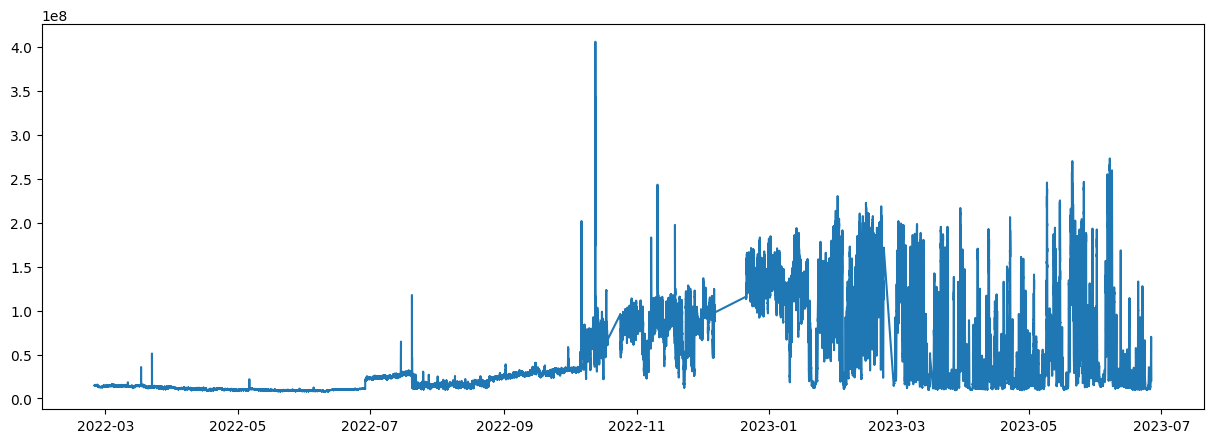

0
654890


In [21]:
df14 = Test["SmFeO32"]

df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice14 = df14[single_date.strftime("%Y-%m-%d"):]
        type(df_slice14.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice14 = df14[:]
plt.plot(df_slice14.index, df_slice14.R)
plt.show()
print(len(date_tot))
print(len(df14))

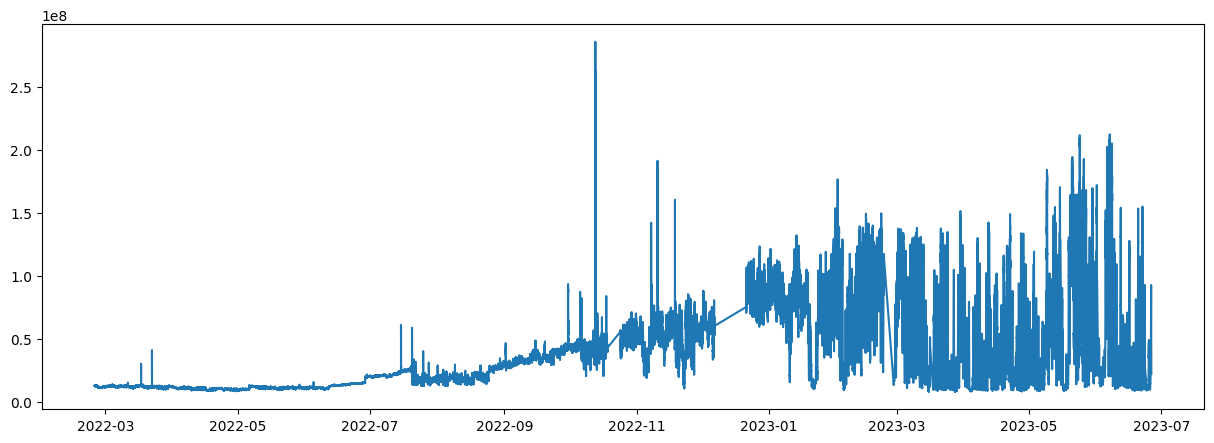

0


In [70]:
df13 = Test["SmFeO31"]

df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice13 = df13[single_date.strftime("%Y-%m-%d"):]
        type(df_slice13.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice13 = df13[:]
plt.plot(df_slice13.index, df_slice13.R)
plt.show()
print(len(date_tot))